# Assignment 1

In [1]:
!pip install wordcloud -q
!pip install autocorrect -q


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import re
import pandas as pd
import nltk
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
nltk.download("stopwords")
nltk.download("words")
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
df = pd.read_csv("A1_dataset.csv")

In [5]:
df.head()

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...


In [6]:
from customregexes import *

---

### II) Text Preprocessing

In [7]:
special_tokens = ['@user', '@url']

In [8]:
from nltk.tokenize import TweetTokenizer

def tokenization(text):
    twt_tk = TweetTokenizer()
    return twt_tk.tokenize(text)

In [9]:
from nltk.corpus import wordnet as wn
wordnet_words = []
for word in wn.words():
    wordnet_words.append(word)

# from nltk.corpus import words
# wrd = words.words()

words = set(wordnet_words)

In [10]:
'helluo' in words

False

In [11]:
# Can use Jaccard distance or edit distance to do this
from nltk.metrics.distance import jaccard_distance, edit_distance
from autocorrect import Speller

# Spelling correction using jaccard distance
def spelling_correction_jaccard(text):
    res = []
    for curr in text:
        if curr not in words:
            crrct_words = []
            for w in words:
                crrct_words.append([jaccard_distance(set(w), set(curr)), w])
            crrct_words = sorted(crrct_words, key = lambda x: x[0])
            res.append(crrct_words[0][1][0])
        else:
            res.append(curr)
    return res

# Spelling correction using edit distance
def spelling_correction_edit(text):
    res = []
    for curr in text:
        if curr not in words:
            crrct_words = []
            for w in words:
                crrct_words.append([edit_distance(w, curr), w])
            crrct_words = sorted(crrct_words, key = lambda x: x[0])
            res.append(crrct_words[0][1])
        else:
            res.append(curr)
    return res

# Spelling correction using edit distance
def spelling_correction_autocorrect(text):
    spell = Speller()
    res = []
    for curr in text:
        if curr not in words:
            res.append(spell(curr))
        else:
            res.append(curr)
    return res

def spelling_correction(text, method ='autocorrect'):
    if method == 'autocorrect':
        return spelling_correction_autocorrect(text)
    elif method == 'edit_distance':
        return spelling_correction_edit(text)
    elif method == 'jaccard':
        return spelling_correction_jaccard(text)
    else:
        raise ValueError('Please use a valid method')

In [12]:
spelling_correction(["helllo", "good"])

['hello', 'good']

In [13]:
#Here we can either do lemmatization or stemming, doing both at the same time will not be useful

from nltk.stem import WordNetLemmatizer, PorterStemmer

def lemmatization_text(text):
    wn = WordNetLemmatizer()
    lemmatized_text = []
    for each in text:
        lemmatized_word = wn.lemmatize(each)
        lemmatized_text.append(lemmatized_word)
    return ' '.join(lemmatized_text)

def stemming_text(text):
    stemmed_text = []
    ps = PorterStemmer()
    for each in text:
        stemmed_word = ps.stem(each)
        stemmed_text.append(stemmed_word)
    return ' '.join(stemmed_text)

In [14]:
lemmatization_text(["dogs", "becomes"]), stemming_text(["dogs", "becomes"])

('dog becomes', 'dog becom')

In [15]:
import string

def remove_punctuations(text):
    puncts = string.punctuation
    s = ""
    for i in text:
        if i not in puncts:
            s += i
    return s

In [16]:
print("Punctuations: ", string.punctuation)
remove_punctuations("lesgoooo!!!!!?!??!! whooohooo!")

Punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'lesgoooo whooohooo'

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append("i'm")
def remove_stopwords(text):
    pattern = re.compile(r'\b(' + (r'|'.join(stop_words)) + r')\b\s*')
    return pattern.sub('', text)

In [18]:
remove_stopwords("the is when am i the when the when name is neemesh aflah")

'name neemesh aflah'

In [19]:
def remove_whitespaces(text):
    return re.sub(r'\s*\s', ' ', text)

In [20]:
remove_whitespaces("whoa a    s f")

'whoa a s f'

In [21]:
def remove_url_html(text):
    urls = findURLs(text)
    for i in urls:
        text = re.sub(f"{i}", "@url", text)
    return text

In [22]:
def remove_users(text):
    username = findUsernames(text)
    for i in username:
        text = re.sub(f"{i}", "@user", text)
    return text

In [23]:
def lowercase_text(text):
    return lowercase(text)

In [24]:
remove_url_html('Something so beautiful I want to share with my tweeter friends  http://www.spiritisup.com/ahuginyourinboxgmb.html')

'Something so beautiful I want to share with my tweeter friends  @url'

In [25]:
# Here we prefer to perform lemmatization over stemming so that the words don't lose their inherent meaning
# and we perform spelling correction using the edit_distance metric in nltk, this is mainly because of the results shown above
# comparing the jaccard distance and the edit distance method.

def preprocess_text(text):
    text = lowercase_text(text)
    text = remove_url_html(text)
    text = remove_users(text)
    text = remove_stopwords(text)
    text = remove_punctuations(text)
    text = remove_whitespaces(text)
    text = tokenization(text)
    text = spelling_correction(text)
    text = lemmatization_text(text)
    return text

In [26]:
preprocess_text('Something so beautiful I want @Aflah to share with my tweeter friends  http://www.spiritisup.com/ahuginyourinboxgmb.html')

'something beautiful want user share tweeter friend user'

In [ ]:
df["PREPROCESSED_TEXT"] = df["TEXT"].progress_apply(lambda row: preprocess_text(row))

  0%|          | 0/4287 [00:00<?, ?it/s]

In [28]:
df

,LABEL,DATE_TIME,TEXT,PREPROCESSED_TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,get threaded scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,user like sedan mango one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,worked car work showing going bed sooooooooooo...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,user actually start afternoon try something we...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...,user www giworryvote nonstop col love much
...,...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock,user performance clip test shock
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on...",gh rcn true blood episode demand 1013
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merch...,returned forest sarah mercy lost key wood day
4285,1,Sun Jun 07 02:09:46 2009,is proud of her dad and his piece of work. ( h...,proud dad piece work user keep papa


In [29]:
df.isna().sum(axis=0)

LABEL                0
DATE_TIME            0
TEXT                 0
PREPROCESSED_TEXT    0
dtype: int64

In [30]:
df.to_csv('PreProcessed.csv')

In [31]:
df = pd.read_csv('PreProcessed.csv')

In [32]:
df = df.fillna("")

---

### III) Visualization

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#### a) Word Clouds of both classes

In [34]:
positive_preprocessed_text = df["PREPROCESSED_TEXT"][df.LABEL==1]
negative_preprocessed_text = df["PREPROCESSED_TEXT"][df.LABEL==0]

In [35]:
positive_preprocessed_text = ' '.join(positive_preprocessed_text.values)
negative_preprocessed_text = ' '.join(negative_preprocessed_text.values)

In [36]:
wordcloud = WordCloud(width = 1500, height = 720,
                background_color ='black',
                min_font_size = 10).generate(positive_preprocessed_text)

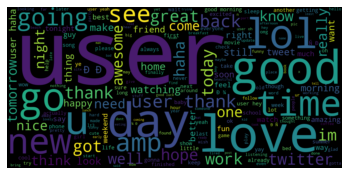

In [37]:
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [38]:
negative_preprocessed_text = ' '.join(negative_preprocessed_text.values)

AttributeError: 'str' object has no attribute 'values'

In [ ]:
wordcloud = WordCloud(width = 1500, height = 720,
                background_color ='black',
                min_font_size = 10).generate(negative_preprocessed_text)

In [ ]:
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

#### b) Comparing both Word Clouds

---

### IV) Rule-Based Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#### a) Retrieving Class Label for every instance

In [ ]:
sid = SentimentIntensityAnalyzer()

#### The metrics used for calculating the labels are:
- The compound score metric: Here we use the compound label from the polarity scores calculated using vader, and check if it is >=0.05 or not, if it is then we mark it as positive else negative
- The pos-neg-neu score metric: Here we use all three, pos neg and neu labels from the polarity scores calculated using vader, and if the neg score is dominating over the other two or the pos score is dominating over the neg score then we classify it as positive, else if the neg score dominates we classify it as negative
- The pos-neg score metric: Here we simply check if the positive score dominates over the negative or not, in the case where it does we classify the text as positive else as negative

In [ ]:
def retrieve_label(y_pred, metric = "compound"):
    if metric == "compound":
        label = int(y_pred["compound"]>=0.05)
    elif metric == "pos_neg_neu_scores":
        if y_pred["neu"]>=y_pred["pos"] and y_pred["neu"]>=y_pred["neg"]:
            label = 1
        elif y_pred["pos"]>=y_pred["neg"]:
            label = 1
        else:
            label = 0
    elif metric == "pos_neg_scores":
        label = int(y_pred["pos"]>=y_pred["neg"])
    else:
        raise ValueError("Use an appropriate metric from compound, pos_neg_neu_scores, pos_neg_scores")
    return label

##### i) On preprocessed text

In [ ]:
prptext_labels = []
for each_text in df["PREPROCESSED_TEXT"].values:
    sentiment_pred = sid.polarity_scores(each_text)
    prptext_labels.append(np.array([retrieve_label(sentiment_pred), retrieve_label(sentiment_pred, "pos_neg_neu_scores"), retrieve_label(sentiment_pred, "pos_neg_scores")]))
prptext_labels = np.array(prptext_labels)

##### ii) On raw text

In [ ]:
rawtxt_labels = []
for each_text in df["TEXT"].values:
    sentiment_pred = sid.polarity_scores(each_text)
    rawtxt_labels.append(np.array([retrieve_label(sentiment_pred), retrieve_label(sentiment_pred, "pos_neg_neu_scores"), retrieve_label(sentiment_pred, "pos_neg_scores")]))
rawtxt_labels = np.array(rawtxt_labels)

#### b) Get accuracy scores

In [ ]:
y = df["LABEL"].values

In [ ]:
def get_accuracy(y_preds, y):
    no_instances = len(y)
    return 100*sum(y_preds==y)/no_instances

##### i) Of preprocessed text

In [ ]:
print("The accuracy score of labels calculated on the preprocessed text is, using the compound score metric: ", get_accuracy(prptext_labels[:, 0], y))
print("The accuracy score of labels calculated on the preprocessed text is, using the pos-neg-neu score metric: ", get_accuracy(prptext_labels[:, 1], y))
print("The accuracy score of labels calculated on the preprocessed text is, using the pos-neg score metric: ", get_accuracy(prptext_labels[:, 2], y))

##### ii) Of raw text

In [ ]:
print("The accuracy score of labels calculated on the preprocessed text is, using the compound score metric: ", get_accuracy(rawtxt_labels[:, 0], y))
print("The accuracy score of labels calculated on the preprocessed text is, using the pos-neg-neu score metric: ", get_accuracy(rawtxt_labels[:, 1], y))
print("The accuracy score of labels calculated on the preprocessed text is, using the pos-neg score metric: ", get_accuracy(rawtxt_labels[:, 2], y))